# 数据概述
[源代码地址](https://www.kaggle.com/dmitriy19/d/kaggle/us-baby-names/exploring-us-baby-names)

## 引入相关包

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

from collections import Counter

import matplotlib.pyplot as plt
%matplotlib inline

## 查看数据内容

In [4]:
data = pd.read_csv('./dataset/NationalNames.csv')
data.head()

,Id,Name,Year,Gender,Count
0,1,Mary,1880,F,7065
1,2,Anna,1880,F,2604
2,3,Emma,1880,F,2003
3,4,Elizabeth,1880,F,1939
4,5,Minnie,1880,F,1746


## 查看数据详情

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1825433 entries, 0 to 1825432
Data columns (total 5 columns):
Id        int64
Name      object
Year      int64
Gender    object
Count     int64
dtypes: int64(3), object(2)
memory usage: 69.6+ MB


# 全美流行的婴儿名字 top25

In [6]:
names_dict = dict()

for index, row in data.iterrows():
    if row['Name'] not in names_dict:
        names_dict[row['Name']] = row['Count']
    else:
        names_dict[row['Name']] += row['Count']

In [7]:
top_25 = Counter(names_dict).most_common(25)
print '全美流行的婴儿名字 top25：'
for pair in top_25:
    print pair[0]

全美流行的婴儿名字 top25：
James
John
Robert
Michael
Mary
William
David
Joseph
Richard
Charles
Thomas
Christopher
Daniel
Elizabeth
Patricia
Matthew
Jennifer
George
Linda
Barbara
Donald
Anthony
Paul
Mark
Edward


# 全美最不流行婴儿名字 top25

In [8]:
print('全美最不流行婴儿名字 top25：')
for pair in Counter(names_dict).most_common()[:-25:-1]:
    print(pair[0])

全美最不流行婴儿名字 top25：
Jaede
Wavalene
Tyieshia
Lillya
Pauleta
Deavyn
Taonna
Elijahray
Graysie
Makalea
Hartzel
Makalei
Vonisha
Ezlynn
Adelaid
Charlae
Charlay
Earin
Janalle
Tyriona
Damori
Thadine
Jylissa
Zhyier


## 名字的平均长度

In [9]:
def average_length_data_transform():
    years = []
    female_average_length = []
    female_average_name_length = dict()
    male_average_length = []
    male_average_name_length = dict()
    
    for index, row in data.iterrows():
        if row['Gender'] == 'F':
            curr_year = row['Year']
            curr_name_length = len(row['Name'])
            if curr_year not in female_average_name_length:
                female_average_name_length[curr_year] = [curr_name_length, 1]
            else:
                female_average_name_length[curr_year][0] += curr_name_length
                female_average_name_length[curr_year][1] += 1
        else:
            curr_year = row['Year']
            curr_name_length = len(row['Name'])
            if curr_year not in male_average_name_length:
                male_average_name_length[curr_year] = [curr_name_length, 1]
            else:
                male_average_name_length[curr_year][0] += curr_name_length
                male_average_name_length[curr_year][1] += 1
    
    for key, value in female_average_name_length.items():
        years.append(key)
        female_average_length.append(float(value[0]) / value[1])
        
    for key, value in male_average_name_length.items():
        years.append(key)
        male_average_length.append(float(value[0]) / value[1])
        
    return (female_average_length, female_average_name_length, male_average_length, male_average_name_length)

In [10]:
female_average_length, female_average_name_length, male_average_length, male_average_name_length = average_length_data_transform()

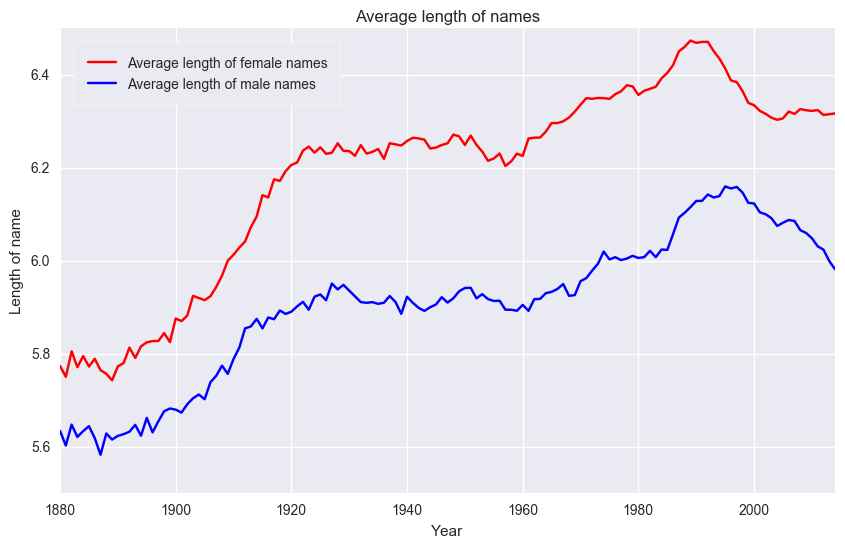

In [12]:
years = range(1880, 2015)
f, ax = plt.subplots(figsize=(10, 6))
ax.set_xlim([1880, 2014])

plt.plot(years, female_average_length, label='Average length of female names', color='r')
plt.plot(years, male_average_length, label='Average length of male names', color='b')

ax.set_ylabel('Length of name')
ax.set_xlabel('Year')
ax.set_title('Average length of names')
legend = plt.legend(loc='best', frameon=True, borderpad=1, borderaxespad=1)

## 唯一姓名分析

In [ ]:
top_in_each_year = dict()
years = range(1880, 2015)

for each_year in years:
    each_year_data = data[data['Year'] == each_year]
    top_in_each_year[each_year] = dict()
    for index, row in each_year_data.iterrows():            
        top_in_each_year[each_year][row['Name']] = row['Count']

In [ ]:
all_sum = []
top_25_sum = []
for year, names_in_year in top_in_each_year.items():
    all_sum.append(sum(Counter(names_in_year).values()))
    top_25 = Counter(names_in_year).most_common(25)
    sum_temp = 0
    for pair in top_25:
        sum_temp += pair[1]
    top_25_sum.append(sum_temp)

In [ ]:
percent_unique_names = np.array(top_25_sum).astype(float) / np.array(all_sum) * 100

In [ ]:
f, ax = plt.subplots(figsize=(10, 6))
ax.set_xlim([1880, 2014])

plt.plot(years, percent_unique_names, label='Percent of unique names', color='black')

ax.set_ylabel('Percent of unique names')
ax.set_xlabel('Year')
ax.set_title('Percent of unique names')
legend = plt.legend(loc='best', frameon=True, borderpad=1, borderaxespad=1)